<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Александр! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и 👍, словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и 🤔, словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком ❌, словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общие-итоги:" data-toc-modified-id="Общие-итоги:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие итоги:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех 👍:


Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.





</div>

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt # v2

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
VERBOSE = 1

In [4]:
print(data.shape)
data.info()
data.head()

(5000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


По возможности избавляемся от дробных типов и дубликатов:

In [5]:
display(f"Записи с дробным возрастом: {(data['Возраст'] % 1).unique()}")
display(f"Записи с дробной зарплатой: {(data['Зарплата'] % 1).unique()}")

'Записи с дробным возрастом: [0.]'

'Записи с дробной зарплатой: [0.00000000e+00 3.63797881e-12 7.27595761e-12 1.00000000e+00]'

In [6]:
data['Зарплата'] = data['Зарплата'] // 1
data['Возраст'] = data['Возраст'].astype('int64')
data['Зарплата'] = data['Зарплата'].astype('int64')
tmp = data.duplicated().sum()
if tmp > 0:
    data = data.drop_duplicates().reset_index(drop=True)
    display(f'В изначальной базе {tmp} дубликатов, которые были удалены.')
data.info()

'В изначальной базе 153 дубликатов, которые были удалены.'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


In [7]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

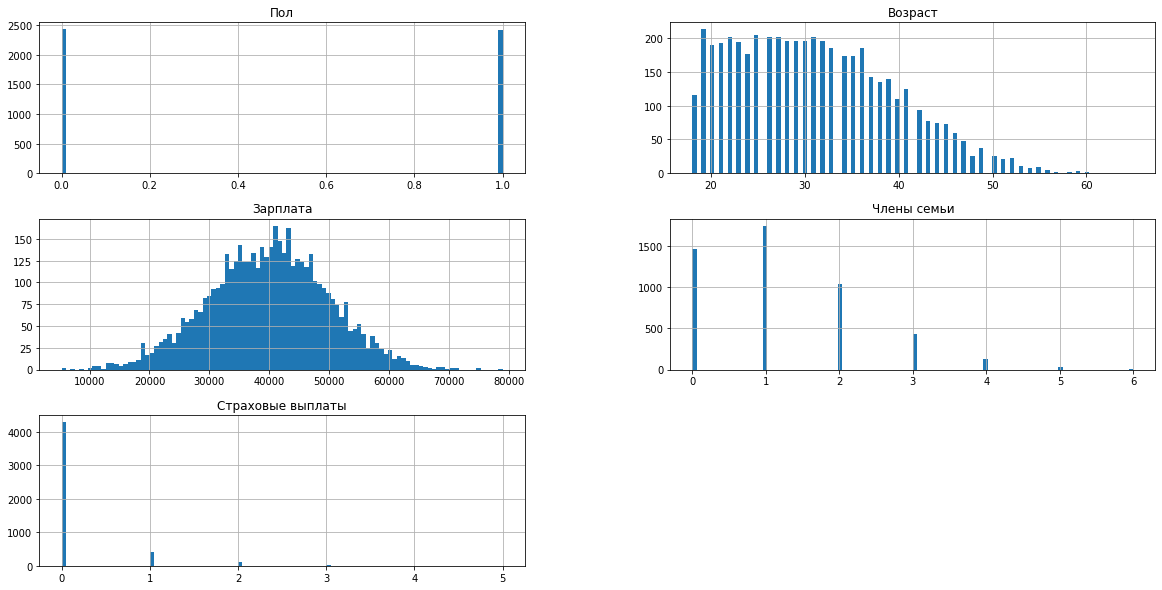

In [8]:
data.hist(figsize=(20,10), bins = 100);

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех 👍: 
    
EDA проведено.  


- Здорово чтоб обращено внимание на типы данных 
    
    
    
<div class="alert alert-warning">


Совет 🤔: 
    
    
- Джентльменский набор при разведочном анализе данных - это .info() + .describe()  .info (дает тебе информацию о пропусках и типах данных), .describe (медианы, квантили, max, min итд) 



- для категориальных мы не используем график hist

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>

По поводу второго пункта: так собственно по гистограммам и смотрел, кто из них категориальный. Можно по названию предположить, но гистограммы покажут более наглядно, являются предполагаемые категориальные переменные таковыми или нет. Это же как раз этап первичного знакомства с данными.
</div>



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Александр! В каком-то смысле да

In [9]:
# v2
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


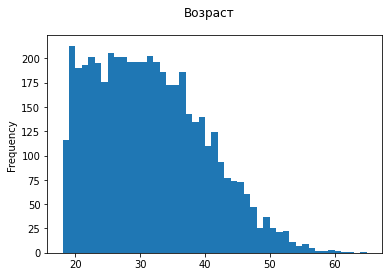

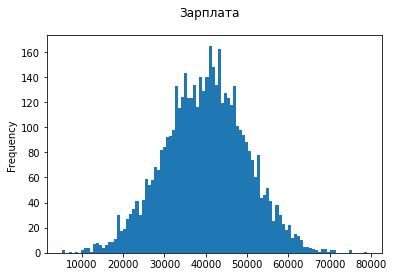

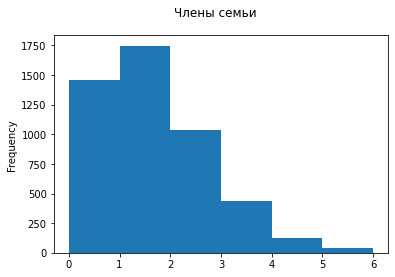

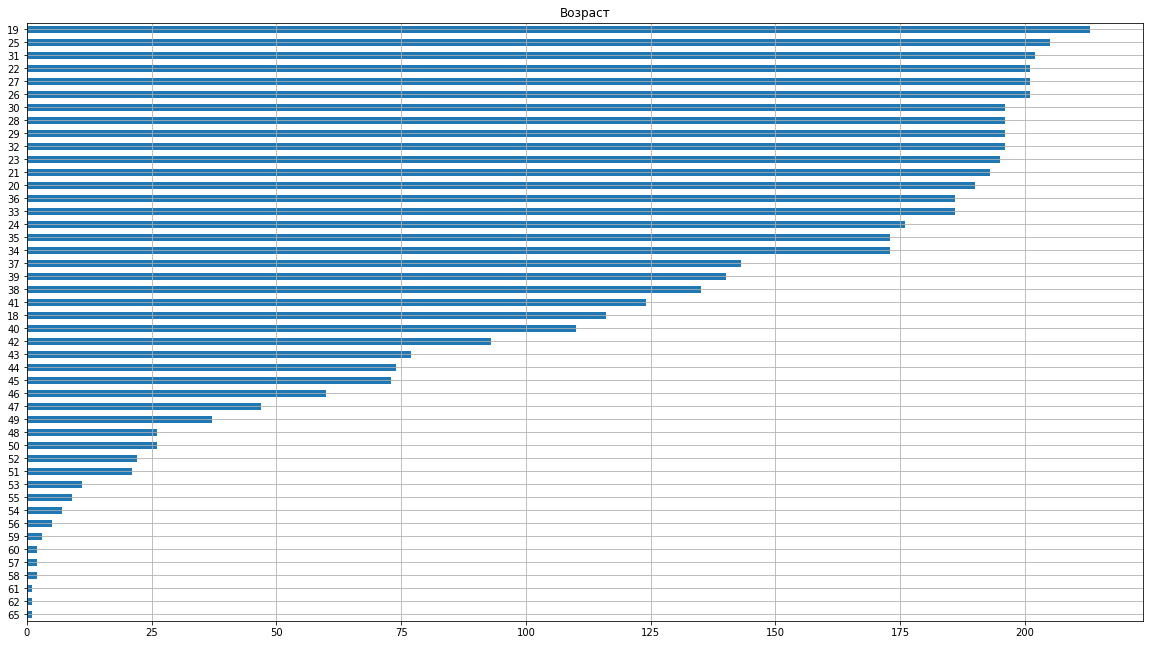

In [10]:
# v2
for column in data.columns:
    tmp = data[column].nunique()
    if tmp > 6: # где проводить границу?
        ax = data[column].plot(kind='hist', subplots=True, title=column, bins=
            (data[column].max() - data[column].min()) // 1 if tmp < 50 else 100)
        plt.show()
tmp = data['Возраст'].value_counts(ascending=True).plot.barh(figsize=(20, 11), grid = True, title='Возраст')


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Возраст тут - тоже категориальная переменная. Но категорий в этой переменной достаточно много. По мне, так в формате гистограммы для переменной "возраст" информация воспринимается легче. Где должна проходить адекватная граница?
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    Где должна проходить адекватная граница?

    
    
Затрудняюсь сказать, думаю что в какой-то книжке есть какой число.  А на мой вкус здесь единственный категориальный признак - это пол    

## Умножение матриц

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10p">

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; background:#eee; color: #aaa">

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* Изменится. Приведите примеры матриц.
* Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
Ответьте на вопрос и обоснуйте решение. 
</div>
    

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не поменяется.

**Обоснование:** $
a_0 = X_0w = X_0(X_0^T X_0)^{-1} X_0^T y
$

Если произвести замену переменных $ X_n = X_0A$, и $k=X_0^T X_0$ , то для новых признаков получим:

$
a_n = X_n\left((X_n)^T (X_n)\right)^{-1} (X_n)^T y = X_0A\left((X_0A)^T (X_0A)\right)^{-1} (X_0A)^T y
$

Воспользуемся следующими свойствами:
* $(AB)C = A(BC)$
* $(AB)^T = B^TA^T$ [wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)
* $(AB)^{-1}=B^{-1}A^{-1}$ [wiki](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) (только для квадратных матриц с ненулевым определителем)
* $(A^T)^{-1}=(A^{-1})^T$ [wiki](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0)
* Матрица k гарантированно квадратная


<div style="text-align:left">

$a_n=X_0A\left((A^TX_0^T) (X_0A)\right)^{-1} (A^TX_0^T) y= $
    
$X_0A\left( A^T(X_0^TX_0)A \right)^{-1}A^TX_0^T y =$
    
$X_0A\left( A^TkA \right)^{-1}A^TX_0^T y =$ (при условии что размерность A равна размерности k) =
    
$X_0A\bigl( \left(kA\right)^{-1}(A^T)^{-1} \bigr)A^TX_0^T y =$

$X_0A\bigl( A^{-1}k^{-1}(A^T)^{-1} \bigr)A^TX_0^T y =$
    
$X_0(AA^{-1})k^{-1}\left((A^T)^{-1} A^T\right)X_0^T y =$

$X_0Ek^{-1}EX_0^T y =$

$X_0(X_0^TX_0)^{-1}X_0^T y = a_0$

</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>

<div style="text-align:left">

$w_n=$(аналогично выкладкам в версии 1)$=A^{-1}k^{-1}EX_0^Ty=A^{-1}w_0$
    
</div>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:




Самая частая ошибка - не учитывают что обратная матрица может быть только у квадратной.  Часто не соблюдают правила матричного преобразования, или меняют матрицы местами при перемножении как цифры.  


У тебя все ОК. 
    


    
<div class="alert alert-warning">



Совет 🤔:    
    
    


  
Есть ещё один способ доказательства   когда мы берём
    
    
$$
w = \arg\min_w MSE(Xw, y)
$$


(кстати можешь объяснить словами что это запись означает?)    
  
и     
    
$$
w_P = \arg\min_w MSE(XPw_p, y)
$$  
    
    
И делая  замену    w_p, видим что задача  
    
$$
\arg\min_w MSE(XPw_p, y)
$$
    
сводится к     
  
    
$$
\arg\min_w MSE(Xw, y)
$$    


Осталось только догадаться какую замену мы делаем.  Можешь попробовать решить и таким способом  

  
</div>
    

    




<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
    <h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Своими словами: argmin даст набор параметров w, при которых минимально значение функции справа. В данном случае, нужно найти значение вектора $w$, при котором достигается минимум среднеквадратичной ошибки между предсказанием $a = Xw$ и истинным значением $y$.

<div style="text-align:left">

$$w_n=\arg\min_{w_n} MSE(XAw_n,y)=\arg\min_{w_n}\left((XAw_n-y) @ (XAw_n-y)\right)^{1/2}=$$
$$\arg\min_{w_n}\left((XAw_n-y)^T(XAw_n-y)\right)^{1/2}=\arg\min_{w_n}\left((XAw_n-y)^T(XAw_n-y)\right)$$
<!--    $$\left(\displaystyle \sum_{i} (XPw_{p_i}-y_i)^2\right)^{0.5} $$-->
Аналогично:
$$w=\arg\min_w MSE(Xw,y)=\arg\min_w\left((Xw-y)^T(Xw-y)\right)$$    

$$\frac{\delta \left((Xw-y)^T(Xw-y)\right)}{\delta w} = \frac{\delta(Xw-y)^T} {\delta w} \frac{\delta \left((Xw-y)^T(Xw-y)\right)}{\delta (Xw-y)^T} = X^T2(Xw-y)=0 $$

$$X^TXw=X^Ty$$
$$w=(X^TX)^{-1}X^Ty$$
Аналогично:
$$(XA)^T2(XAw_n-y)=0$$
$$A^TX^TXAw_n=A^TX^Ty$$
$$w_n=(X^TXA)^{-1}X^Ty=A^{-1}(X^TX)^{-1}X^Ty=A^{-1}w$$
</div>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Соотношение получено




<div class="alert alert-warning">


Совет 🤔:


А по поводу 2 способа доказательства - оно очень короткое и вот что я имел в виду:    
    
    
    
    
Для исходных данных мы решаем это  
    
$$
w = \arg\min_w MSE(Xw, y)
$$
    
  
Для преобразованных данных решаем это  
    
$$
w_P = \arg\min_w MSE(XPw_p, y)
$$  
    
    
Давай сделаем замену   w_p на $P^{-1}w$ (Конечно мы это соотношение не берём из первого доказательства, иначе смысл во втором доказательстве просто нет. Тут типа математическая интуиция сработала, догадались как то о такой замене. Хотя догадаться можно, ведь видно что нам нужно избавиться от P)
    
 
И подставим:    
    
$$
\arg\min_w MSE(XPP^{-1}w, y)
$$
  
    
    
сократим и получим 
  
    
$$
\arg\min_w MSE(Xw, y)
$$    

    
    
    
    
Получается если заменить $w_p$ на $P^{-1}w$, то получаем ту же самую постановку задачи!  
     
    
</div>



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка ❌:
    

  
Нет ответа на "как связаны параметры линейной регрессии в исходной задаче и в преобразованной"

Какое соотношение между $w$ и $w_p$?
    
    
Где   



$$
w = (X^T X)^{-1} X^T y
$$
    
    
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y
$$   


## Алгоритм преобразования

**Алгоритм**

1. Считаем количество признаков (n)
2. Создаем произвольную обратимую матрицу размером n+1 (назовем ее A). Нормализуем ее, чтобы определитель был примерно равен 1 (для уменьшения ошибок округления при умножении)
3. Создаем первичную матрицу признаков, в которой помимо собственно признаков будет дополнительный нулевой столбец, заполненный единицами (назовем матрицу X0).
4. Умножим X0 на A. Полученную матрицу назовем Xn.
5. Полученную матрицу Xn сохраняем как обфускационные данные клиентов (без целевого признака).
6. Обучаем модель на Xn
7. Если требуется, дополнительно обфусцировать целевой признак, можно использовать битовую операцию XOR с суммой признаков X0.
8. Для предсказания потенциального количества страховых выплат для нового клиента умножаем вектор его признаков $X_{k0}$ на A (при этом получаем вектор $X_{kn}$). Далее передаем полученный вектор $X_{kn}$ в обученную модель, на выходе получаем предсказание.
9. Для восстановления признаков по конктретному клиенту, надо его обфускационные данные умножить на матрицу $A^{-1}$.
10. Если требуется, после восстановления признаков, расшифровывается значение целевого признака.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех 👍:


Принято

<div class="alert alert-warning">

Совет 🤔:

    
    

- Не они очень понятно зачем ты сдаёшь дополнительный столбец  из единичек, это делается если хочется использовать формулу, а ты использовал LinearRegression из библиотеки 
    
- Сразу начал с того что Матрица у тебя обратимая. А что если сгенерированная матрица будет необратимой? Тут можно расписать порядок действий на все случаи в том числе на этот.  И тогда алгоритм будет полнее
    

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* По большому счету, да, не почистил за собой. В начале проекта у меня почему-то отложилось, что надо будет сравнивать то, что по формуле считается с тем, что дает библиотека.
* Если матрица будет не обратимой, то это означает, что одна из строк/столбцов матрицы является линейной комбинацией других. Умножение на такую матрицу, насколько я понимаю, равносильно уменьшению количества признаков на количество столбцов в матрице, являющихся линейной комбинацией других.
* Данное преобразование является лишь обфускацией данных. Шифрованием это назвать нельзя, так как атака по открытому тексту гарантированно раскроет признаки всех клиентов при наличии $n^2$ открытых записей клиентов.
* На основе этого нет смысла выбирать криптостойкое преобразование для хранения целевых признаков. Было выбрано простейшее симметричное преобразование.
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



    Если матрица будет не обратимой, то это означает, что одна из строк/столбцов матрицы является линейной комбинацией других

    
Не обязательно, тут ты видимо путаешь обратимость и мультиколлинеарность.  Необратимая означает что у матрицы нет обратной матрицы, необратимая матрица не обязательно является мультиколлинеарной, и необратимость матрицы не означает, что в ней обязательно есть мультиколлинеарные признаки
    
    
    
    Данное преобразование является лишь обфускацией данных. Шифрованием это назвать нельзя, так как атака по открытому тексту гарантированно раскроет признаки всех клиентов при наличии  𝑛2 открытых записей клиентов.
    
    
    
Возможно, я очень далёк от шифрования    
    

**Обоснование**
* Как было показано выше, если обучить модель линейной регрессии на данных, умноженных на обратимую матрицу, предсказания будут в точности такими же.
* Корректность восстановления исходных призноков следует из следующего равенства: $X_nA^{-1}=X_0AA^{-1}=X_0E=X_0$

## Проверка алгоритма

In [11]:
# step 1,2
n = len(data.columns)
maximum_number_of_generation_attempts = 10
attempt_number = 0
while True:
    A = np.array([np.random.randint(low=0, high=10*n, size=n) for i in range(n)])
    if np.linalg.det(A) > 0:
        det_mul = 1 / float(np.linalg.det(A)**(1/n))
        A = A * det_mul
        break
    attempt_number += 1
    if attempt_number > maximum_number_of_generation_attempts: raise Warning(
f"Не удалось сформировать обратимую матрицу размером {n}x{n} за {maximum_number_of_generation_attempts} шагов")
Ai = np.linalg.inv(A)
if VERBOSE > 0: print('n=', n, '\n\nA=',str(A), '\n\ndet(A)=',np.linalg.det(A) ,'\n\nAi=', Ai, sep='')


n=5

A=[[1.40207052 0.32606291 1.07600761 0.22824404 0.16303146]
 [0.94558245 0.81515728 1.30425165 0.88036986 0.7499447 ]
 [1.43467682 1.46728311 0.81515728 0.16303146 0.29345662]
 [0.06521258 0.         0.19563775 1.43467682 1.53249569]
 [0.94558245 1.40207052 0.45648808 0.71733841 0.26085033]]

det(A)=1.0000000000000004

Ai=[[ 1.18533397 -1.22278071  0.12780539  0.39648844  0.30151013]
 [-0.89226177  0.38361397  0.54550562 -0.21885016  0.12682426]
 [-0.39053273  1.50289254 -0.21755367 -0.55773693 -0.55528073]
 [ 0.65225973 -0.06592768 -1.67435922  0.00453715  1.63887813]
 [-0.61121063 -0.07810587  1.58981951  0.70261145 -1.47621221]]


In [12]:
# step 3
X0 = np.concatenate((np.ones((data.shape[0], 1)), data.iloc[:,:-1]), axis=1)
y0 = data.iloc[:,-1].values
if VERBOSE > 0:
    display('data',data, HTML('<hr>'))
    display('X0', pd.DataFrame(X0), HTML('<hr>'))
    display('y0', y0, HTML('<hr>'))

'data'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
...,...,...,...,...,...
4842,0,28,35700,2,0
4843,0,34,52400,1,0
4844,0,20,33900,2,0
4845,1,22,32700,3,0


'X0'

,0,1,2,3,4
0,1.0,1.0,41.0,49600.0,1.0
1,1.0,0.0,46.0,38000.0,1.0
2,1.0,0.0,29.0,21000.0,0.0
3,1.0,0.0,21.0,41700.0,2.0
4,1.0,1.0,28.0,26100.0,0.0
...,...,...,...,...,...
4842,1.0,0.0,28.0,35700.0,2.0
4843,1.0,0.0,34.0,52400.0,1.0
4844,1.0,0.0,20.0,33900.0,2.0
4845,1.0,1.0,22.0,32700.0,3.0


'y0'

array([0, 1, 0, ..., 0, 0, 0])

In [13]:
# step 4, 5, 9
Xn = X0.dot(A)

def repair_features(X):
    return Xn.dot(Ai)

if VERBOSE > 0:
    display('Xn', Xn, HTML('<hr>'))
    display('repair_features(Xn)', pd.DataFrame(repair_features(Xn)), HTML('<hr>'))
    display(f"признаков, у которых разница деобфускационных данных и исходных больше порога:\
        {((repair_features(Xn) - X0) > 1E-6).sum()}")


'Xn'

array([[3.29665908e+03, 6.27018981e+01, 9.73989048e+03, 7.11684803e+04,
        7.60249918e+04],
       [2.54642092e+03, 6.92231564e+01, 7.47326414e+03, 5.45261640e+04,
        5.82487591e+04],
       [1.41247193e+03, 4.28772730e+01, 4.13310827e+03, 3.01331693e+04,
        3.21910828e+04],
       ...,
       [2.24269332e+03, 3.24758661e+01, 6.65041177e+03, 4.86404676e+04,
        5.19581578e+04],
       [2.16919874e+03, 3.76276601e+01, 6.41903753e+03, 4.69207792e+04,
        5.01207606e+04],
       [2.69109504e+03, 4.36272177e+01, 7.96855371e+03, 5.82542696e+04,
        6.22287156e+04]])

'repair_features(Xn)'

,0,1,2,3,4
0,1.0,1.000000e+00,41.0,49600.0,1.000000e+00
1,1.0,-3.218679e-14,46.0,38000.0,1.000000e+00
2,1.0,-9.314819e-13,29.0,21000.0,5.534169e-12
3,1.0,-5.708084e-13,21.0,41700.0,2.000000e+00
4,1.0,1.000000e+00,28.0,26100.0,7.131431e-12
...,...,...,...,...,...
4842,1.0,-1.019900e-12,28.0,35700.0,2.000000e+00
4843,1.0,-1.060065e-12,34.0,52400.0,1.000000e+00
4844,1.0,-1.036739e-12,20.0,33900.0,2.000000e+00
4845,1.0,1.000000e+00,22.0,32700.0,3.000000e+00


'признаков, у которых разница деобфускационных данных и исходных больше порога:        0'

In [14]:
# step 6

model_xn = LinearRegression()
model_xn.fit(Xn,y0);

In [15]:
# step 7, 10
# v1 X_sum = np.dot(X0, [1,1,1,1,1]).astype(int) # key = сумма всех признаков в векторе
X_sum = np.dot(np.ones((1,n)), X0.T).astype(int) # v2
y_xor = y0 ^ X_sum
if VERBOSE > 0:
    display(y_xor)
    display(f'несовпадающих элементов в целевом признаке после деобфускации: {((y_xor ^ X_sum) != y0).sum()}' )

array([[49644, 38049, 21030, ..., 33923, 32727, 40631]])

'несовпадающих элементов в целевом признаке после деобфускации: 0'

array([ 0.51903524,  0.69204196,  0.09386405, ..., -0.26193077,
       -0.19418654,  0.05028512])

'неверных предсказаний:281'

count    4847.000000
mean        0.152014
std         0.307573
min        -0.376852
25%        -0.096609
50%         0.123325
75%         0.359850
max         1.388434
dtype: float64


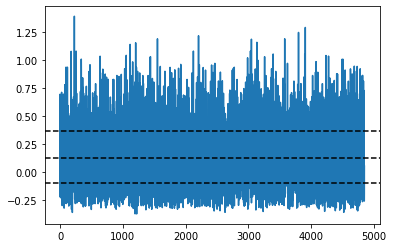

In [16]:
# step 8
predict_xn = model_xn.predict(Xn)
if VERBOSE > 0:
    display(predict_xn)
    display(f'неверных предсказаний:{(predict_xn.round(0)!=y0).sum()}')
    tmp2=pd.Series(predict_xn)
    print(tmp2.describe())
    ax=tmp2.plot();
    for i in ['25%', '50%', '75%']: ax.axhline(tmp2.describe()[i], color='k', linestyle='--');


In [17]:
model_x0 = LinearRegression()
model_x0.fit(X0, y0)
predict_x0 = model_x0.predict(X0)
display(f'Максимальная разница предсказаний по X0 и Xn: {(predict_x0 - predict_xn).max()}')
display(f'r2(predict_x0)={r2_score(y0, predict_x0)} r2(predict_xn)={r2_score(y0, predict_xn)} \
разница={r2_score(y0, predict_x0)-r2_score(y0, predict_xn)}')


'Максимальная разница предсказаний по X0 и Xn: 0.000400900886600164'

'r2(predict_x0)=0.4302010046633359 r2(predict_xn)=0.43020245238078125 разница=-1.4477174453686459e-06'

Посмотрим, как изменятся предсказания, если перед обучением нормализировать признаки:

In [18]:
transformer = Pipeline(steps=[('scaler', StandardScaler())])
model_norm_xn=Pipeline(steps=[('transformer', transformer),('regressor', LinearRegression())])
model_norm_x0=Pipeline(steps=[('transformer', transformer),('regressor', LinearRegression())])
model_norm_xn.fit(Xn,y0)
pred_norm_xn=model_norm_xn.predict(Xn)
model_norm_x0.fit(X0,y0)
pred_norm_x0=model_norm_x0.predict(X0)
display(f'разница предсказаний после нормировки: {(pred_norm_xn-pred_norm_x0).max()}')
display(f'r2(pred_norm_x0)={r2_score(y0, pred_norm_x0)} r2(pred_norm_xn)={r2_score(y0, pred_norm_xn)} \
разница={r2_score(y0, pred_norm_x0)-r2_score(y0, pred_norm_xn)}')

'разница предсказаний после нормировки: 2.7172708527700706e-13'

'r2(pred_norm_x0)=0.4302010046633359 r2(pred_norm_xn)=0.430201004663335 разница=8.881784197001252e-16'

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:



Можно реализовать pipeline, с собственной функцией преобразования данных - в нашем случае перемножение наших данные на сгенерированную матрицу. Какого то практического смысла это иметь не будет, напомню что pipeline мы используем для того чтобы не было утечки данных (плюс достигается краткость ), зато можно поупражняться.

 
Можешь взять за основу [Ссылка 1](https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-polzovatelskih-preobrazovatelei-dannyh-62b2a9a80e49941961ffc7a2),
[Ссылка 2](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156)

На выходе мы должны получить что-то вроде

    pipe_cripto = Pipeline([
            ('transformer', MatrixTransformer(X.columns)),
            ('model', LinearRegression()),
        ])


    pipe_cripto.fit(X_train)

    pipe_cripto.predict(X_test)








<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>

С этим более-менее понятно. По паплайнам интересны ветвящиеся алгоритмы (обработка сырых данных -> передача их в **несколько** моделей -> объединение результатов нескольких моделей в одну (например, выбираем лучшую на основе какой-то метрики). Именно в рамках единого паплайна. Наставник обещал на следующей неделе осветить эти вопросы.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Отлично




</div>


Вывод: разница предсказаний расчитанных с и без обфускации порядка 1E-4. Если при этом перед обучением нормализовать X0, то  разница предсказаний практически исчезает. То же саммое касается и метрики R2.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех 👍:
    
Все сошлось. Отдельный плюс за: 
    
    
- универсальность кода: код отработает для любой размерности матрицы обьект-признак  

    
- использование конструкции while, чтобы гарантированно получить обратимую матрицу 
    


<div class="alert alert-warning">


Совет 🤔: 
    


- каноны ML - когда мы моделируем, разбиваем датасет на несколько, используя train для обучения и test для проверки, опять же это никак не изменит выводы, но каноны стоит уважать
   


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Принято. Согласен, это подсветило... Гмм... Мою лень... Постораюсь дальше не опускать тивиальные действия.
</div>





<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка ❌:

Александр, было бы замечательно, в конце немножко о данных, работе с ними, моделировании и полученных результатах, доказательствах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе. Вырабатывай рефлексы правильного оформления проектов )


</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
## Общие итоги:
Работа состояла из нескольких этапов:
    
* На этапе первичного знакомства с данными:
    * сырые данные были приведены к целому типу
    * были удалены повторяющиеся строки
    * была проведена проверка на пропуски
* На этапе теоретических рассчетов анализировалось умножение матриц:
    * анализировалось влияние умножения признаков на обратимую матрицу на качество линейной регрессии. Было доказано, что качество не изменится.
    * было доказано, что предсказания после обучения на обфускационных данных (на вновь обученой модели) полностью совпадают с предсказаниями модели, обученной на сырых данных.
    * была указана связь параметров линейной регрессии в исходной задаче и в преобразованной
* На этапе разработки алгоритма преобразования
    * был предложен алгоритм обфускации и восстановления признаков
    * был предложен алгоритм обфускации и восстановления целевых признаков
    * было указано, что данные преобразования являются лишь обфускацией данных, и не являются криптостойким шифрованием.
*  На этапе проверки алгоритма были вычесленны предсказания на основе имеющхся данных для моделей обученых на сырых и обфускацированных данных. Предсказания полностью совпали (как следствие, совпали и R2 метрики).
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

Общий вывод расписан и структурирован по логическим блокам проекта
    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Александр, у тебя старательно выполненная работа, все четко, осмысленно. Отмечаю уровень твоей программистской подготовки. 




Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    


Обязательное к исправлению:



    


- выводим соотношение между  𝑤  и  𝑤𝑝 



 
    
- стоит добавить общий вывод (лицо проекта)







Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 








<div class="alert alert-warning">
<b>Комментарий ревьюера</b>



На мой взгляд проект очень необычный, выделяющийся из остальных проектов потому что касается раздела математики лежащей в основе машинного обучения  (помимо производных, матанализа и теории вероятности с матстатистикой). Если в дальнейшем ты углубишься в изучении нейростетей, то понимание линейной алгебры будет очень полезным, потому что, по сути, все нейросети - это перемножение матриц и Линейная алгебра даёт очень компактный способ записи того что происходит в нейросетях. 

Кроме того языком линейной алгебра можно объяснить тематическое моделирование и pca (через сингулярное разложение)

Мне не очень нравится эти ссылки, наверняка можно найти получше, но там вполне наглядно показывают связь между линейной алгебры и многослойным перцептроном
    
https://www.youtube.com/watch?v=kmdqBlls_HQ    
https://www.youtube.com/watch?v=AOZZeTQl4Xc


Это даже важно как "понятийный язык", вот здесь о модели word2vec (это NLP) рассказываться "языком линейной алгебры" с [22 минуты](https://www.youtube.com/watch?v=MBQdMQUZMQM&t=3340s) 
    

Возможно будет полезно:
    

    
- Если хочешь посмотреть вообще про линейную алгебру и матрицы, то мне нравится  вот это [видео](https://www.youtube.com/watch?v=RNTRYicPvWQ&list=PLVjLpKXnAGLXPaS7FRBjd5yZeXwJxZil2), рассказывается по существу и увлекательно.  


- по применению криптографии в машинном обучении на английском: [тут](https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf)




<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
Благодарю
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено. Надеюсь мои советы и ссылки были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



  
Отличная работа Александр. Желаю успехов в дальнейшей учебе!



## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования